In [3]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.stats as st
import scipy.linalg as sl

In [3]:
from bayesfilt.sigma_points import * 
from bayesfilt.unscented_kf import * 

In [30]:
m = [5., 5.]
P = np.array([[4., 0.], [0., 4.]])
#P = 1.

In [43]:
sigma_obj = MerweScaledSigmaPoints(n=len(m), alpha=0.5, beta=0, kappa=4.)
#sigma_obj = JulierSigmaPoints(n=len(m), kappa=5.)
sigma_obj

MerweScaledSigmaPoints object
n = 2
alpha = 0.5
beta = 0
kappa = 4.0
Wm = [-0.33333333  0.33333333  0.33333333  0.33333333  0.33333333]
Wc = [0.41666667 0.33333333 0.33333333 0.33333333 0.33333333]
subtract = <ufunc 'subtract'>
sqrt = <function cholesky at 0x1307ff040>

In [44]:
### pass through nonlinear function
def nonlinear_fun(x):
    return np.sqrt(x**2)
    #return np.exp(x)
    #return 2*x+1

# sigma points
x_sigma_points = sigma_obj.sigma_points(m, P)
y_sigma_points = np.atleast_2d(nonlinear_fun(x_sigma_points.T)).T

### use unscented transform to get new mean and covariance
y_ut_mean, y_ut_cov = unscented_transform(y_sigma_points, sigma_obj.Wm, sigma_obj.Wc)

#generate random points
#np.random.seed(100)
grv = st.multivariate_normal(m, P)
x_mc_points = np.atleast_2d(st.multivariate_normal.rvs(mean=m, cov=P, size=100000))
y_mc_points = nonlinear_fun(x_mc_points)

print('MC mean: ', np.mean(y_mc_points, axis=0))
print('UT mean: ', y_ut_mean)

print('MC cov: \n', np.cov(y_mc_points.T))
print('UT cov: \n', y_ut_cov)

# print('MC cov: ', np.cov(y_mc_points.T))
# print('UT cov: ', np.cov(y_sigma_points.T))

MC mean:  [4.99377019 5.01082694]
UT mean:  [5. 5.]
MC cov: 
 [[ 3.90849718 -0.00456775]
 [-0.00456775  3.93086766]]
UT cov: 
 [[4.00000000e+00 7.38718511e-33]
 [0.00000000e+00 4.00000000e+00]]


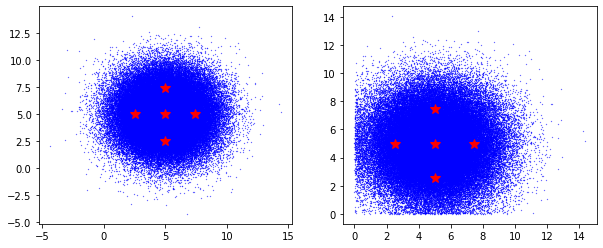

In [45]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(x_mc_points[:,0], x_mc_points[:,1], '.b', markersize=0.5, label='MC')
ax[0].plot(x_sigma_points[:,0], x_sigma_points[:,1], '*r', markersize=10., label='Sigma')

ax[1].plot(y_mc_points[:,0], y_mc_points[:,1], '.b', markersize=0.5, label='MC')
ax[1].plot(y_sigma_points[:,0], y_sigma_points[:,1], '*r', markersize=10., label='Sigma')

In [128]:
P = np.array([[1,.3],[0.3,1.]])
P1 = sl.cholesky(P)
P2 = sl.sqrtm(P)
P1,P2

(array([[1.       , 0.3      ],
        [0.       , 0.9539392]]),
 array([[0.98841773, 0.1517577 ],
        [0.1517577 , 0.98841773]]))

In [129]:
P1.T@P1

array([[1. , 0.3],
       [0.3, 1. ]])

In [134]:
P2.T@P2

array([[1. , 0.3],
       [0.3, 1. ]])